Download this page as a jupyter notebook at [Lesson 13](http://54.243.252.9/engr-1330-webroot/1-Lessons/Lesson13/ENGR-1330-Lesson13.ipynb)

# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 31 January 2021

## Lesson 13 Data Science Inferences from Visual Display of Data  

This lesson further explores using graphics to learn about and explain data behavior.  


---

In [80]:
# Script block to identify host, user, and kernel
import sys
! hostname; ! whoami; ! pwd; 
print(sys.executable)

atomickitty
sensei
/home/sensei/engr-1330-webroot/1-Lessons/Lesson13
/opt/jupyterhub/bin/python3


In [81]:
%%html
<!-- Script Block to set tables to left alignment -->
<style>
  table {margin-left: 0 !important;}
</style>

## Data Model Conceptual Example

Recall our line chart tool, and the time-speed data

Consider the experimental data below

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 

Show the relationship between time and speed.  What can we learn about the relationship? Is it linear, quadratic, cubic, hyperbolic?  How do we explore these questions?

---

First lets build a plotting function that plots observations and data model values on same chart.

In [82]:
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Observations','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()

Test our function, we will plot the data as red markers and the model as blue lines; in this instance we will just reuse data so the plot will look perfect, but its only to test the plotting function.

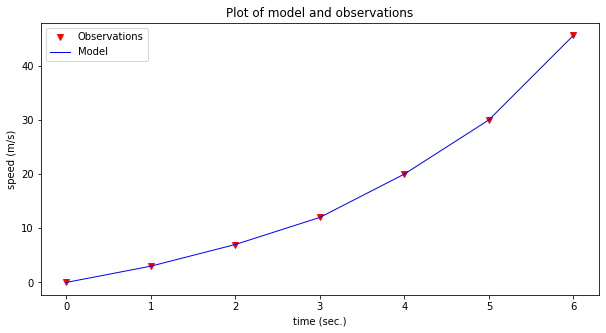

In [83]:
# Create two lists; time  and speed - these represent observations
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]
make2plot(time,speed,time,speed,'time (sec.)','speed (m/s)','Plot of model and observations')
# lets plot, set second list set to 0,0 
# make2plot(time,speed,[0,0],[0,0],'time (sec.)','speed (m/s)','Plot of model and observations')

---

Now we can consider a data model.  For this example, lets simply stipulate that the relationship may be up to a 3-rd order polynomial (an unfed parrot if you will).

$y = \beta_0 + \beta_1 \cdot x + \beta_2 \cdot x^2 + \beta_2 \cdot x^3$

where $y$ in this example is speed in meters/second, and $x$ is time in seconds.  As a data model all we are doing is explaining the structure of the relationship, if we knew that it is a physical process we might adjust our model to be constant acceleration kinematics.  However for the example, the polynomial will suffice.

In [84]:
# Create a data model - lets use a polynomial model
def polynomial(b0,b1,b2,b3,x):
    # return y = b0 + b1*x + b2*x**2 + b3*x**3
    polynomial=b0+b1*x+b2*x**2+b3*x**3  
    return(polynomial)

Now we have a data model, that returns speed given time according to a polynomial equation.

Lets do some trial-and-error guess at values for $\beta_0,\beta_2,\beta_2,\beta_3$ 

We will start with 

> - b0 = 0
> - b1 = 1
> - b2 = 0
> - b3 = 0

And adjust from there

Then lets end with

> - b0 = 0
> - b1 = 1.3
> - b2 = 0.75
> - b3 = 0.05

Enter b0 value 0
Enter b1 value 1.3
Enter b2 value 0.75
Enter b3 value  0.05


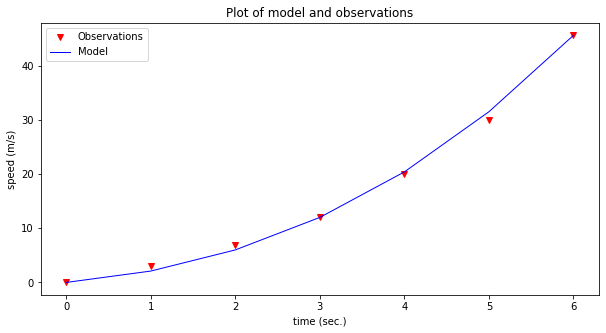

In [86]:
# prompt for inputs of b0,b1,b2,b3
# do some trial and error 0,1.3,0.75,0.05
intercept=float(input('Enter b0 value'))
linear=float(input('Enter b1 value'))
quadratic=float(input('Enter b2 value'))
cubic=float(input('Enter b3 value '))
# build a data model
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

The last plot looks kind of decent, how could we "measure" the model's prediction value?

We can compute the difference between the observations and the model, add them all up and see how close to perfect we get.

In [87]:
# Prediction Error
pe = [] # empty list to store prediction errors
for i in range(len(time)):
    pe.append(speed[i]-modelSpeed[i])
sum(pe)

8.881784197001252e-15

In [88]:
# Squared Prediction Error
sqpe = [] # empty list to store prediction errors
for i in range(len(time)):
    sqpe.append(pow(speed[i]-modelSpeed[i],2))
sum(sqpe)

4.219999999999999

It becomes apparent quickly that it is a hastle to keep going back, so lets wrap things in a while loop so we can keep track of our trials.

Enter b0 value, current value = 0 0
Enter b1 value, current value = 0 1.3
Enter b2 value, current value = 0 0.75
Enter b3 value, current value = 0 0.05


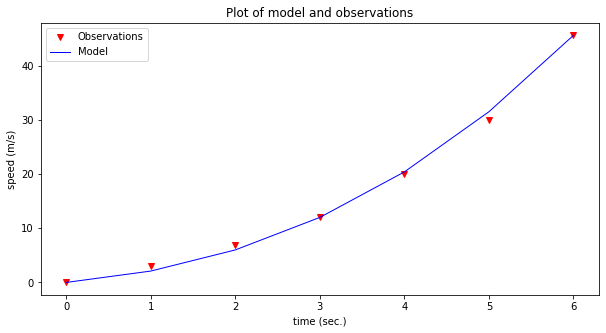

Current squared error =  4.219999999999999


do you want to stop? y or n y


In [89]:
quit=True
# put some default values
intercept=0
linear=0
quadratic=0
cubic=0
# here is the control loop
while quit:
# prompt for inputs of b0,b1,b2,b3
# do some trial and error 0,1.3,0.75,0.05
    intercept=float(input('Enter b0 value, current value = '+str(intercept)))
    linear=float(input('Enter b1 value, current value = '+str(linear)))
    quadratic=float(input('Enter b2 value, current value = '+str(quadratic)))
    cubic=float(input('Enter b3 value, current value = '+str(cubic)))
# build a data model
    modelSpeed = [] # empty list
    for i in range(len(time)):
        modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
    make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')
    # Squared Prediction Error
    sqpe = [] # empty list to store prediction errors
    for i in range(len(time)):
        sqpe.append(pow(speed[i]-modelSpeed[i],2))
    print('Current squared error = ',sum(sqpe))
    stop = input('do you want to stop? y or n') # here is how we stop
    if stop == 'y':
        quit=False
    else:
        continue # keep going!

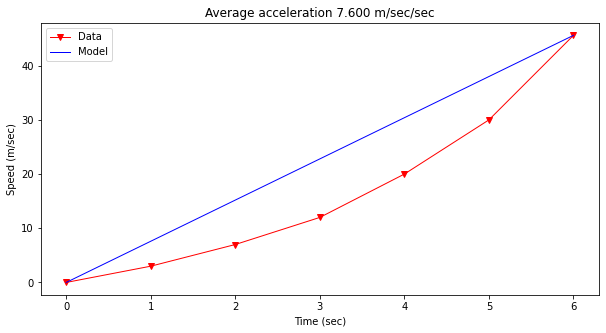

In [21]:
# Estimate acceleration (naive)
dvdt = (max(speed) - min(speed))/(max(time)-min(time))
plottitle = 'Average acceleration %.3f' % (dvdt) + ' m/sec/sec'
seriesnames = ['Data','Model']
modely = [min(speed),max(speed)]
modelx = [min(time),max(time)]
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='v',linewidth=1) # basic line plot
plt.plot(modelx, modely, c='blue',linewidth=1) # basic line plot
plt.xlabel('Time (sec)')
plt.ylabel('Speed (m/sec)')
plt.legend(seriesnames)
plt.title(plottitle)
plt.show()

Now lets predict a value within our observations, say the speed at 4.5 seconds.  Looking at the graph it looks like about 25 m/sec.  But we have the data model, so just use it.

In [90]:
mytime=float(input('enter an elapsed time'))
myspeed = polynomial(intercept,linear,quadratic,cubic,mytime)
print('The estimated speed is ',myspeed)

enter an elapsed time 4.5


The estimated speed is  25.59375


Now lets predict a value beyond the observations, say the speed at 7 seconds.  Looking at the graph the best we can say is if the curvature is extended the value is somewhere near 60 (surely bigger than 45).   But beyond that we know nothing.  The data model allows extrapolation simply because we have declared it the relationship that explains the observatons.  If the model were based on some physical, chemical, or biological process we might actually be comfortable making extrapolations; here we will just stipulate that 1 more second is close to the observations, so we will extrapolate; again using our data model:

In [91]:
mytime=float(input('enter an elapsed time'))
myspeed = polynomial(intercept,linear,quadratic,cubic,mytime)
print('The estimated speed is ',myspeed)

enter an elapsed time 7


The estimated speed is  63.0


---
## Data Models (Interpolation using Lagrangian Polynomials)

The Starship rocket in the figure below sends a lot of telemetry data to both on-board and off-board (ground-based) control computers.  

![https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg/800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.jpg](800px-SpaceX_Starship_SN8_launch_as_viewed_from_South_Padre_Island.png)

Suppose telemetry is received every 1/10 of a second, providing the altitude (position) of the craft, something like the figure below.

![](altitude-time.png)

How can one estimate the altitude at intermediate times (between the 1/10 of a second "true" values)?

The problem is a type of interpolation problem similar to calculating water density from tables for intermediate values by assuming a straight line passed between the two values from the table. However it may not be appropriate to assume that the altitudes are linear with time.  The special challenge comes when we want to estimate intermediate values when there is a maximum or minimum in the tabular structure, and we will have to process many records for different cases.

The classical approach to such a problem is to fit a polynomial to the tabular results and interrogate the resulting polynomial to obtain estimates of the intermediate values.  This prediction engine (the polynomial) is required to return the exact value at a observation location (in our case a 1/10 second interval).  This requirement is quite distinct from other types of prediction engines we will study.

### Lagrangian Interpolation

Polynomial interpolation is the method of determining a polynomial that fits a set of given points. There are several approaches to polynomial interpolation, of which one of the most well known is the Lagrangian method. The Lagrangian polynomial [https://en.wikipedia.org/wiki/Lagrange_polynomial](https://en.wikipedia.org/wiki/Lagrange_polynomial) is the polynomial of order $n-1$, where $n$ is he number of tabular data pairs we wish to interpolate. 

Suppose we have a table of data (or telemetry sent back from our rocket), of $x-$ and $f(x)$-values:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|$$x_1$$ |$$f_1$$|
|$$x_2$$   |$$f_2$$|
|$$x_3$$   |$$f_3$$|
|$$x_4$$ |$$f_4$$|

The highest order polynomial that can be passed through these four data pairs is a cubic.  A Lagrangian form for such a cubic is

$$ P_3(x) = f(x_1)\frac{(x-x_2)(x-x_3)(x-x_4)}{(x_1-x_2)(x_1-x_3)(x_1-x_4)} + f(x_2)\frac{(x-x_1)(x-x_3)(x-x_4)}{(x_2-x_1)(x_2-x_3)(x_2-x_4)} + f(x_3)\frac{(x-x_1)(x-x_2)(x-x_4)}{(x_3-x_1)(x_3-x_2)(x_3-x_4)} +f(x_4)\frac{(x-x_1)(x-x_2)(x-x_3)}{(x_4-x_1)(x_4-x_2)(x_4-x_3)} $$

Notice that it is constructed of four terms, each of which is a cubic in $x$; hence the sum is a cubic also.  The pattern of each term is to form the numerator as a product of differences of the form $(x-x_i)$, omitting one $x_i$ in each term, the ommitted term is used in the denominator as a replacement for $x$ in each position in the numerator.  In each term, the difference factor is multiplied by the value $f_i$ corresponding to the $x_i$ ommitted in the numerator. The Lagragian polynomial for other degrees of interpolating polynomials employs this same pattern of forming a sum of polynomials of the desired degree. 

Of importance is that the polynomial is intended to be used for interpolation, that is the value we seek $P(x^*)$ assumes we will supply $x^*$ in the range $[x_1 , x_4]$.  Going outside this range is called extrapolation, and interpolator-type prediction engines are the wromg tool!

### Example 1

Consider the three observations below, estimate (predict) the value for $f(2.3)$.

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|1.1  |10.6|
|1.7  |15.2|
|3.0  |20.3|

The Lagrangian form of the highest order of polynomial that can pass through the 3 data pairs is the quadratic:

$$ P_2(x) = f(x_1)\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)} + f(x_2)\frac{(x-x_1)(x-x_3)}{(x_2-x_1)(x_2-x_3)} + f(x_3)\frac{(x-x_1)(x-x_2)}{(x_3-x_1)(x_3-x_2)} $$

Once the denominators are completed, it is relatively straightforward to compute the estimate (prediction), in this case

$$ P_2(x) = (10.6)\frac{(x-1.7)(x-3.0)}{(1.1-1.7)(1.1-3.0)} + (15.2)\frac{(x-1.1)(x-3.0)}{(1.7-1.1)(1.7-3.0)} + (20.3)\frac{(x-1.1)(x-1.7)}{(3.0-1.1)(3.0-1.7)} $$

At $x=2.3$ the result is $P_2(2.3)=18.38$.  

Naturally, we want to use Computational Thinking principles, to pattern match and generalize the arithmetic as below.

In [92]:
def lagint(xlist,ylist,xpred):
    # lagrangian interpolation of order len(xlist)-1 
    # 
    lagint = 0.0 # ypred is an accumulator, and will be output
    norder = len(xlist)
    for i in range(norder):
        term = ylist[i] # build up terms of polynomial
        for j in range(norder):
            if (i != j):
                term = term * (xpred-xlist[j])/(xlist[i]-xlist[j])
#            pass # may not need this expression
        lagint = lagint + term
#    print(i,j) #debugging expression
    return(lagint)

In [93]:
xtable = [1.1,1.7,3.0]
ytable = [10.6,15.2,20.3]

xwant = 2.3

print(round(lagint(xtable,ytable,xwant),2))

18.38


### Example 2

This example is copied from [https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html](https://rstudio-pubs-static.s3.amazonaws.com/286315_f00cf07beb3945d2a0260d6eaecb5d36.html)

In the original source the author plots the resulting function, we can do the same here.  First the observation set:

|$$x~$$  | $$~f(x)$$   |
|:---  | :--- |
|0 |7|
|2 |11|
|3 |28|
|4 |63|

Next we will plot the interpolating polynomial from $x=0$ to $x=4$ in steps of 0.1

In [94]:
xtable = [0.1,0.3,0.5,0.7,0.9,1.1,1.3]
ytable = [0.003,0.067,0.148,0.248,0.370,0.518,0.697]
xwant = 0.3
print(lagint(xtable,ytable,xwant))

0.067


In [95]:
# Observations
xtable = [0,2,3,4]
ytable = [7,11,28,63]
#
xpred = [] # empty list to store results for plotting
ypred = [] # empty list to store results for plotting
#
step_size = 0.10  # step size
how_many = int((xtable[len(xtable)-1])/step_size)
# build the predictions
for i in range(how_many+1): 
    xpred.append(float(i)*step_size)
    ypred.append(lagint(xtable,ytable,float(i)*step_size))
#print(lagint(xtable,ytable,xwant))

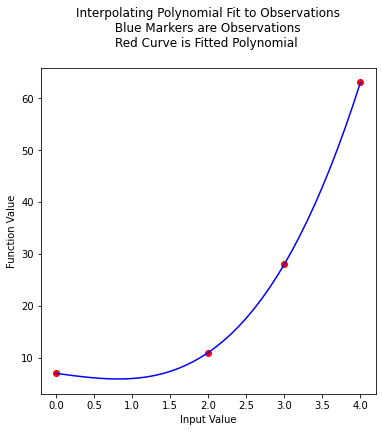

In [120]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (6,6)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(xtable, ytable ,color ='red') # The observations as points
matplotlib.pyplot.plot(xpred, ypred, color ='blue') # the polynomial
matplotlib.pyplot.xlabel("Input Value") 
matplotlib.pyplot.ylabel("Function Value") 
mytitle = "Interpolating Polynomial Fit to Observations\n "
mytitle += "Blue Markers are Observations " + "\n"
mytitle += "Red Curve is Fitted Polynomial "+ "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

### Data Models of Distributions

Another kind of data science question is the prediction of things with a probabilistic component.

Consider the data of annual peak streamflow somewhere.

What's the smallest value observed? largest?

In [97]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
#beargrass.head()

<AxesSubplot:xlabel='Year'>

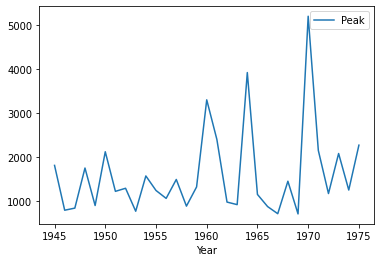

In [98]:
beargrass.plot(x='Year',y='Peak')

In [99]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

In [106]:
beargrass['Peak'].std()**2

1012517.9311827957

- What is the chance of observing a value in future years of 0 or smaller ?  (High or Low)
- What is the chance of observing a value in future years of 1600 or smaller ? (High or Low)
- What is the chance of observing a value in future years of 3900 or larger ? (High or Low)

Just like a polynomial model above, there are data models we can use to help answer such questions.  Here we will examine these data using a distribution model. Distribution models are expressed as a density function and/or a cumulative distribution function. 

A useful notation using the Normal density function as an example is:

$ \text{pdf(x)} = \frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) $

In the function, $x$ is the random (independent) variable, $\mu$ is called the **population** mean and $\sigma^2$ is called the **population** variance.  

Often we don't actually know the population values so we estimate them from the collection of observations, in this context these are called the **sample** mean and variance.   Computation of the **sample** values is done using methods described in the earlier lesson on descriptive statistics.

The integral of the $ \text{pdf(x)} $ from $-\infty~to ~ X $, produces a result called the cumulative distribution function.  The value $ X $ is not a random variable, but the integral of the accumulated probability of the random variable $x$ being less than or equal to $X$.

A useful notation using the Normal distribution as an example is:

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\sigma \sqrt{2\pi}} \times exp (-\frac{(x-\mu)^2}{2 \sigma^2}) dx}$$

For the Normal distribution the integral is a special function called the Error function and can be written as:

$$ F(X) =  \frac{1}{2} \cdot (1+erf(\frac{(X-\mu)}{\sqrt{2} \sigma}))$$

**The equations change with different distribution models** 

Here we will build a normal distribution model, essentially the functions for the above equations, and then will plot them.

In [100]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

enter a value for mu 1599
enter a value for dispersion 979856


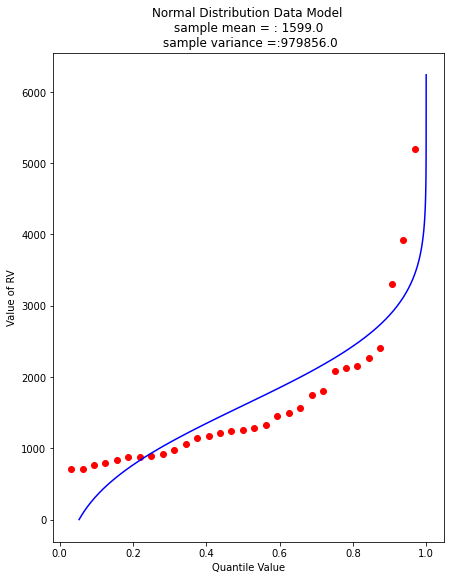

In [115]:
import numpy
sample = beargrass['Peak'].tolist() # put the peaks into a list
#sample_mean = numpy.array(sample).mean()
#sample_variance = numpy.array(sample).std()**2
sample_mean = float(input('enter a value for mu'))
sample_variance = float(input('enter a value for dispersion'))
################
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='red') 
matplotlib.pyplot.plot(ycdf, x, color ='blue') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model \n sample mean = : " + str(sample_mean)+ " \n sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [119]:
mymu = float(input('enter sample mean'))
mysig = float(input('enter sample variance'))
myval = float(input('enter variable value'))
prob_est = normdist(myval,mymu,mysig**(0.5))
print('Non-exceedence probability',round(prob_est,3))

enter sample mean 1599
enter sample variance 979856
enter variable value 3900


Non-exceedence probability 0.99


## References

1. Grus, Joel (2015-04-14). Data Science from Scratch: First Principles with Python
(Kindle Locations 1190-1191). O'Reilly Media. Kindle Edition. 

2. Call Expressions in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/03/3/Calls.html

3. Functions and Tables in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html

4. Visualization in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/07/Visualization.html

5. Documentation; The Python Standard Library; 9. Numeric and Mathematical Modules https://docs.python.org/2/library/math.html

6. https://matplotlib.org/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html?highlight=horizontal%20bar%20chart

7. https://www.geeksforgeeks.org/bar-plot-in-matplotlib/